In [1]:
# Setup

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
# Import

In [4]:
df = pd.read_excel('data/imf.xls')
df.head()
df.shape

(229, 46)

In [5]:
df = df.rename(columns={'Real GDP growth (Annual percent change)': 'Country'})
df.head()

,Country,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,1,2.2,2.7,2.7,3,3.5,4,4.5,5,5.5
2,Albania,2.7,5.7,2.9,1.1,2,-1.5,5.6,-0.8,-1.4,...,2.2,3.3,3.8,4.1,3,4,4,4,4,4
3,Algeria,-5.4,3,6.4,5.4,5.6,5.6,-0.2,-0.7,-1.9,...,3.7,3.2,1.3,1.4,2.6,2.4,1.8,1.4,1,0.8
4,Angola,2.4,-4.4,0,4.2,6,3.5,2.9,4.1,6.1,...,0.9,-2.6,-0.2,-1.2,-0.3,1.2,2.9,3.3,4.1,3.8


In [6]:
gdp_col_name = 'GDP Growth'

tidy_df = df.melt(id_vars=['Country'], var_name='year', value_name=gdp_col_name)
tidy_df[gdp_col_name] = pd.to_numeric(tidy_df[gdp_col_name], errors='coerce')
tidy_df.head()

,Country,year,GDP Growth
0,NaN,1980,NaN
1,Afghanistan,1980,NaN
2,Albania,1980,2.7
3,Algeria,1980,-5.4
4,Angola,1980,2.4


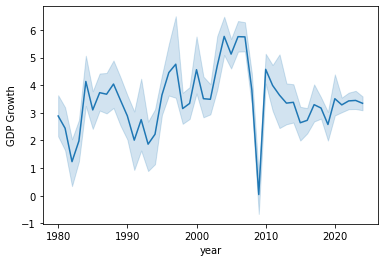

In [7]:
sns_plot = sns.lineplot(x="year", y=gdp_col_name, data=tidy_df)

In [8]:
# Select Countries

In [10]:
eurovision_2020 = ["France", "Germany", "Italy", "Netherlands", "Spain", "United Kingdom", "Albania", "Armenia", "Australia", "Austria", "Azerbaijan", "Belarus", "Belgium", "Bulgaria", "Croatia", "Cyprus", "Czech Republic", "Denmark", "Estonia", "Finland", "Georgia", "Greece", "Iceland", "Ireland", "Israel", "Latvia", "Lithuania", "Malta", "Moldova", "North Macedonia", "Norway", "Poland", "Portugal", "Romania", "Russia", "San Marino", "Serbia", "Slovenia", "Sweden", "Switzerland", "Ukraine"]
cool_countries_df = tidy_df.loc[tidy_df['Country'].isin(eurovision_2020)]

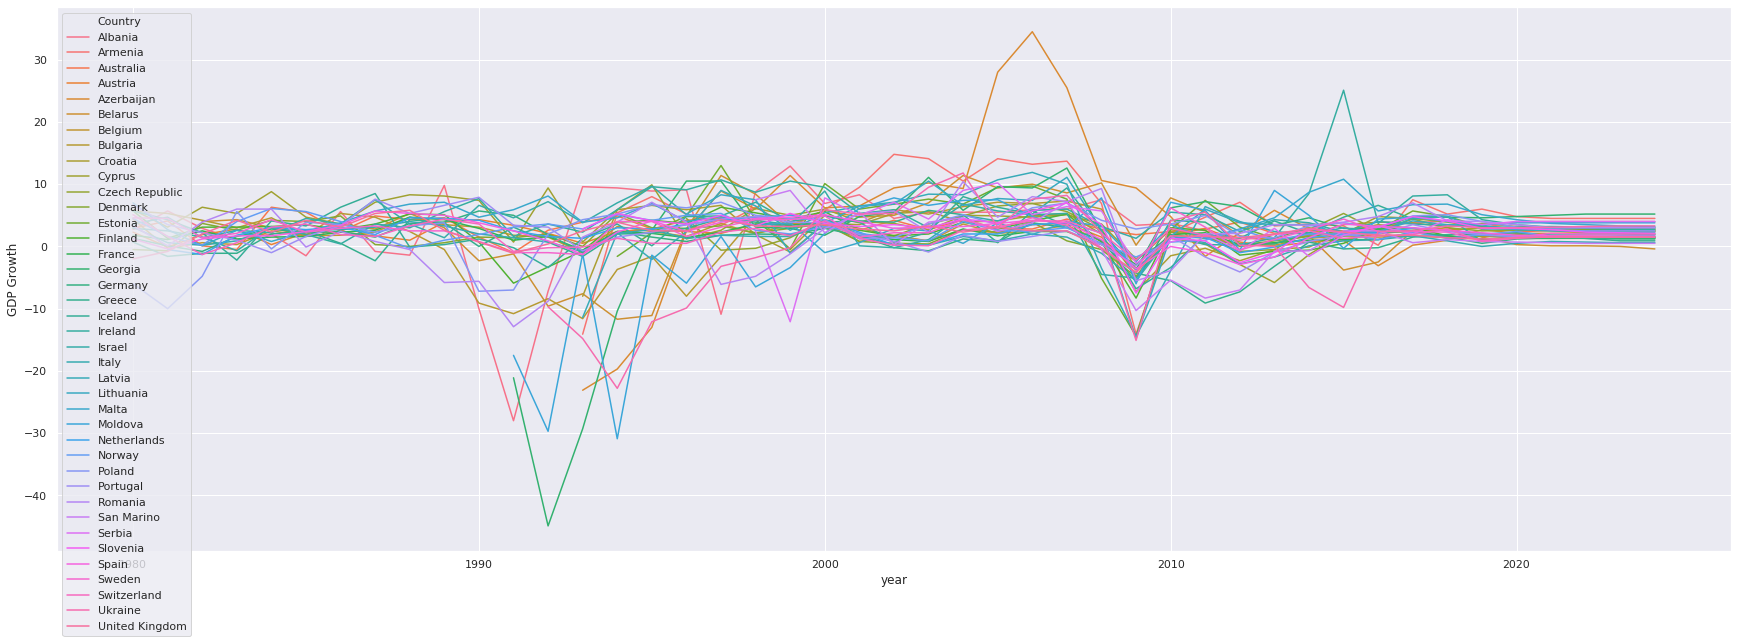

In [12]:
sns.set(rc={'figure.figsize':(30,10)})  # make it bigger

sns_plot = sns.lineplot(x="year", y=gdp_col_name, hue='Country', data=cool_countries_df)

In [13]:
# Save to file

In [14]:
sns_plot.get_figure().savefig("output.png")